GAN예시 코드

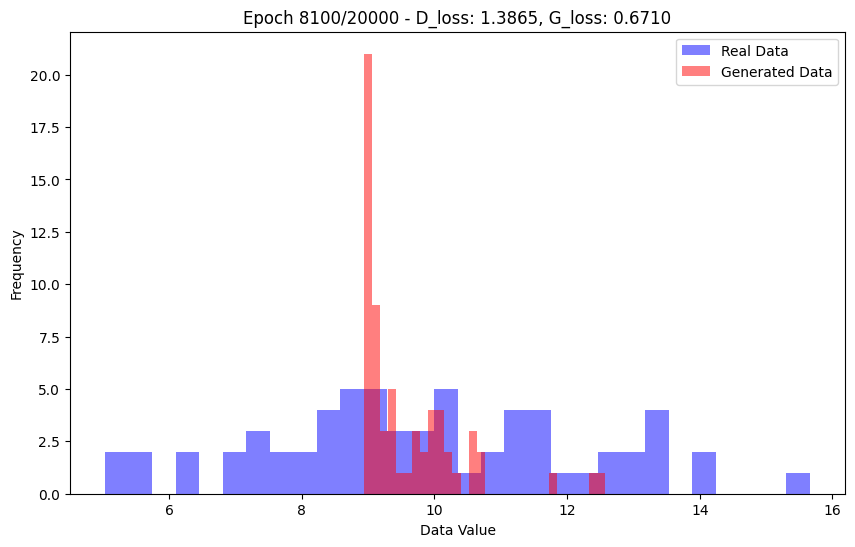

에폭 [8100/20000], D_loss: 1.3865, G_loss: 0.6710


KeyboardInterrupt: 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

# Colab/Jupyter에서 그래프를 셀 안에 정적으로 출력하도록 설정
%matplotlib inline

# 1. 생성자(Generator) 모델 정의
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.main(x)

# 2. 판별자(Discriminator) 모델 정의
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

# 3. 모델 및 최적화 설정
generator = Generator()
discriminator = Discriminator()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# 4. 학습 루프 및 시각화
num_epochs = 20000
batch_size = 64

print("GAN 학습을 시작합니다. 그래프는 100 에폭마다 업데이트됩니다...")

for epoch in range(num_epochs):
    real_data = torch.randn(batch_size, 1).to(device) * 2 + 10
    noise = torch.randn(batch_size, 1).to(device)
    fake_data = generator(noise)

    d_optimizer.zero_grad()
    d_loss_real = criterion(discriminator(real_data), torch.ones(batch_size, 1).to(device))
    d_loss_fake = criterion(discriminator(fake_data.detach()), torch.zeros(batch_size, 1).to(device))
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    d_optimizer.step()

    g_optimizer.zero_grad()
    g_loss = criterion(discriminator(fake_data), torch.ones(batch_size, 1).to(device))
    g_loss.backward()
    g_optimizer.step()

    # 100 에폭마다 그래프를 업데이트
    if (epoch + 1) % 100 == 0:
        clear_output(wait=True) # 이전 셀 출력 지우기
        plt.figure(figsize=(10, 6))
        plt.title(f"Epoch {epoch+1}/{num_epochs} - D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")
        plt.xlabel("Data Value")
        plt.ylabel("Frequency")

        plt.hist(real_data.cpu().numpy(), bins=30, alpha=0.5, label='Real Data', color='blue')
        plt.hist(fake_data.detach().cpu().numpy(), bins=30, alpha=0.5, label='Generated Data', color='red')

        plt.legend()
        plt.show()
        print(f"에폭 [{epoch+1}/{num_epochs}], D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

print("\n학습이 완료되었습니다!")

MetricGAN

In [2]:
# Hugging Face transformers 라이브러리 설치
# 코랩 환경이 아니라면 아래 주석을 풀고 실행하세요.
# !pip install transformers accelerate

from transformers import pipeline
import torch

# GPU 사용 가능 여부 확인
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"사용 가능한 디바이스: {device}")

# Whisper 모델 로드 (가볍고 빠른 'small' 모델 사용)
# 다른 모델을 사용하려면 'openai/whisper-base', 'openai/whisper-medium' 등으로 변경 가능
whisper_pipe = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-small",
    device=device
)

# Whisper 모델 로드 (가볍고 빠른 'small' 모델 사용)
# 다른 모델을 사용하려면 'openai/whisper-base', 'openai/whisper-medium' 등으로 변경 가능
# whisper_pipe = pipeline(
#     "automatic-speech-recognition",
#     model="openai/whisper-small",
#     device=device
# )

whisper_pipe = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-small",
    device=device,
    chunk_length_s=30,  # 길게 녹음할 때 내부 청크 단위
    generate_kwargs={
        "language": "ko",       # 한국어 약어 또는 "korean"
        "task": "transcribe"    # 번역이 아닌 전사 모드
    }
)


사용 가능한 디바이스: cuda:0


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Device set to use cuda:0
Using `chunk_length_s` is very experimental with seq2seq models. The results will not necessarily be entirely accurate and will have caveats. More information: https://github.com/huggingface/transformers/pull/20104. Ignore this warning with pipeline(..., ignore_warning=True). To use Whisper for long-form transcription, use rather the model's `generate` method directly as the model relies on it's own chunking mechanism (cf. Whisper original paper, section 3.8. Long-form Transcription).


In [ ]:
import torch
import torchaudio
import IPython.display as ipd
from speechbrain.pretrained import SpectralMaskEnhancement
import matplotlib.pyplot as plt
import numpy as np
import os

# SpeechBrain 라이브러리 설치 (처음 실행 시 한 번만)
!pip install speechbrain

# 사전 학습된 GAN 모델 불러오기 (MetricGAN+)
enhance_model = SpectralMaskEnhancement.from_hparams(
    source="speechbrain/metricgan-plus-voicebank",
    savedir="pretrained_models/metricgan-plus-voicebank"
)


Loaded clean audio file: /content/원본.wav

--- 결과 오디오 재생 ---
1. 깨끗한 원본 오디오:


2. 노이즈가 섞인 오디오 (SNR: 15 dB):


3. 향상된(잡음 제거) 오디오:


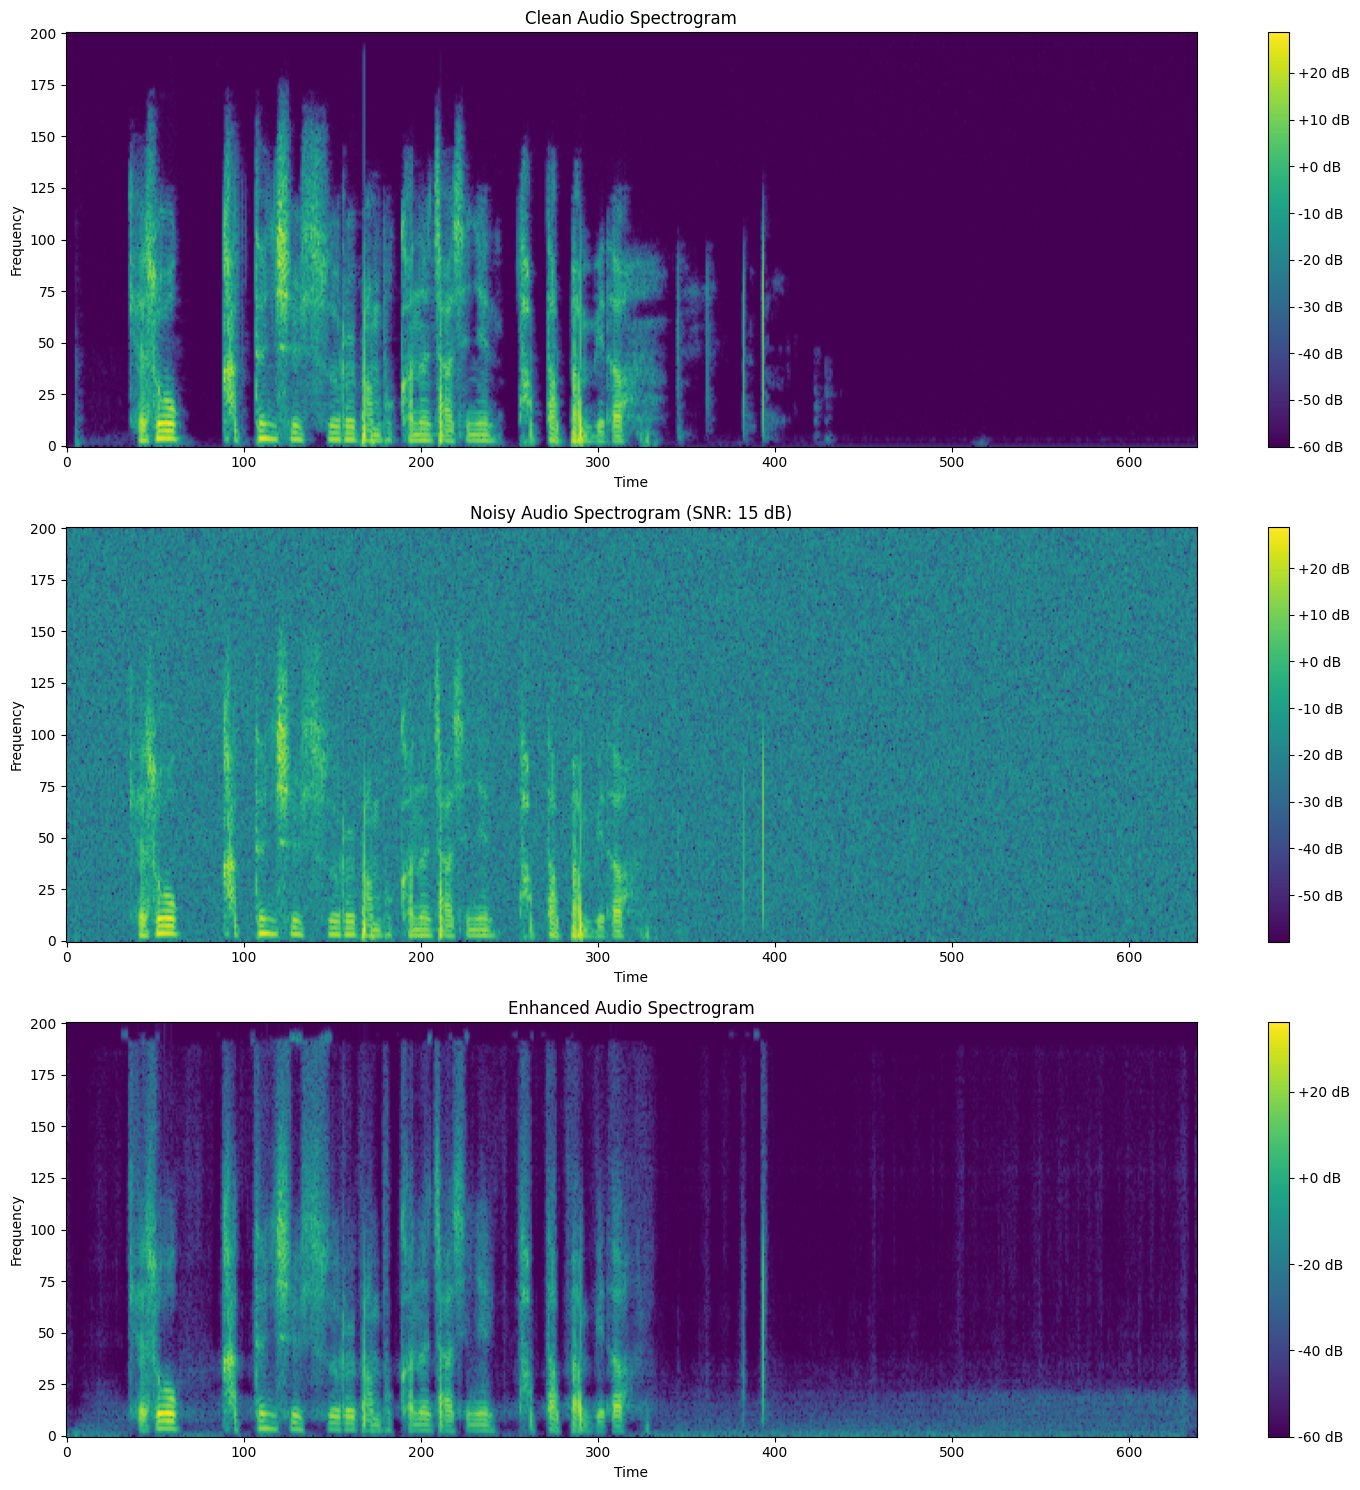

Using `chunk_length_s` is very experimental with seq2seq models. The results will not necessarily be entirely accurate and will have caveats. More information: https://github.com/huggingface/transformers/pull/20104. Ignore this warning with pipeline(..., ignore_warning=True). To use Whisper for long-form transcription, use rather the model's `generate` method directly as the model relies on it's own chunking mechanism (cf. Whisper original paper, section 3.8. Long-form Transcription).
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



[STT 결과]
 계속 같은 실수를 반복하는 자신이 답답합니다.


In [19]:

# 깨끗한 음성 파일 경로 지정
clean_file = '/content/원본.wav'

try:
    clean_audio, sr = torchaudio.load(clean_file)
    print(f"Loaded clean audio file: {clean_file}")
except Exception as e:
    print(f"Error loading audio file: {e}")
    exit()

# SNR을 조정하여 노이즈를 생성하고 섞기
snr_db = 15

signal_power = torch.mean(clean_audio**2)
noise_power = signal_power / (10**(snr_db / 10))

noise = torch.randn_like(clean_audio)
noise = noise * torch.sqrt(noise_power / torch.mean(noise**2))

noisy_audio = clean_audio + noise
noisy_audio = noisy_audio / torch.max(torch.abs(noisy_audio))
torchaudio.save("noisy_input.wav", noisy_audio, sr)
noisy_file = "noisy_input.wav"

# GAN 모델을 사용하여 음성 향상
enhanced_audio = enhance_model.enhance_file(noisy_file)

print("\n--- 결과 오디오 재생 ---")
print("1. 깨끗한 원본 오디오:")
display(ipd.Audio(data=clean_audio.squeeze(0), rate=sr))

print("2. 노이즈가 섞인 오디오 (SNR: {} dB):".format(snr_db))
display(ipd.Audio(data=noisy_audio.squeeze(0), rate=sr))

print("3. 향상된(잡음 제거) 오디오:")
display(ipd.Audio(data=enhanced_audio.squeeze(0), rate=sr))
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Clean Audio Spectrogram
spectrogram_clean = torchaudio.transforms.Spectrogram()(clean_audio)
log_spectrogram_clean = 10 * torch.log10(spectrogram_clean + 1e-6)
im1 = axs[0].imshow(log_spectrogram_clean.squeeze(0).numpy(), origin='lower', aspect='auto', cmap='viridis')
axs[0].set_title("Clean Audio Spectrogram")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Frequency")
fig.colorbar(im1, ax=axs[0], format="%+2.0f dB")

# Noisy Audio Spectrogram
spectrogram_noisy = torchaudio.transforms.Spectrogram()(noisy_audio)
log_spectrogram_noisy = 10 * torch.log10(spectrogram_noisy + 1e-6)
im2 = axs[1].imshow(log_spectrogram_noisy.squeeze(0).numpy(), origin='lower', aspect='auto', cmap='viridis')
axs[1].set_title(f"Noisy Audio Spectrogram (SNR: {snr_db} dB)")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Frequency")
fig.colorbar(im2, ax=axs[1], format="%+2.0f dB")

# Enhanced Audio Spectrogram
spectrogram_enhanced = torchaudio.transforms.Spectrogram()(enhanced_audio)
log_spectrogram_enhanced = 10 * torch.log10(spectrogram_enhanced + 1e-6)
im3 = axs[2].imshow(log_spectrogram_enhanced.squeeze(0).numpy(), origin='lower', aspect='auto', cmap='viridis')
axs[2].set_title("Enhanced Audio Spectrogram")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Frequency")
fig.colorbar(im3, ax=axs[2], format="%+2.0f dB")

plt.tight_layout()
plt.show()

result = whisper_pipe(
    {"raw": enhanced_audio.squeeze(0).cpu().numpy(), "sampling_rate": sr},
    chunk_length_s=30, # 긴 오디오 파일 처리를 위해 청크 설정
)
# 결과 출력
print("\n[STT 결과]")
print(result['text'])

In [20]:
# -------------------------------
# 편집 거리 + 연산 추적 함수
# -------------------------------

def levenshtein_ops(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = [[0]*(n+1) for _ in range(m+1)]
    op = [[None]*(n+1) for _ in range(m+1)]  # 연산 기록

    for i in range(m+1):
        dp[i][0] = i
        op[i][0] = 'D' if i > 0 else None
    for j in range(n+1):
        dp[0][j] = j
        op[0][j] = 'I' if j > 0 else None

    for i in range(1, m+1):
        for j in range(1, n+1):
            if seq1[i-1] == seq2[j-1]:
                dp[i][j] = dp[i-1][j-1]
                op[i][j] = 'E'  # 일치
            else:
                del_cost = dp[i-1][j] + 1
                ins_cost = dp[i][j-1] + 1
                sub_cost = dp[i-1][j-1] + 1
                min_cost = min(del_cost, ins_cost, sub_cost)
                dp[i][j] = min_cost
                if min_cost == sub_cost:
                    op[i][j] = 'S'  # 치환
                elif min_cost == del_cost:
                    op[i][j] = 'D'  # 삭제
                else:
                    op[i][j] = 'I'  # 삽입

    # 연산 추적
    i, j = m, n
    subs, ins, dels = 0, 0, 0
    while i > 0 or j > 0:
        if op[i][j] == 'E':
            i -= 1
            j -= 1
        elif op[i][j] == 'S':
            subs += 1
            i -= 1
            j -= 1
        elif op[i][j] == 'D':
            dels += 1
            i -= 1
        elif op[i][j] == 'I':
            ins += 1
            j -= 1

    return dp[m][n], subs, ins, dels

# -------------------------------
# 평가 함수 (WER, CER + 정확도 + 세부연산)
# -------------------------------

def wer_detail(reference, hypothesis):
    ref_words = reference.strip().split()
    hyp_words = hypothesis.strip().split()
    distance, subs, ins, dels = levenshtein_ops(ref_words, hyp_words)
    wer_score = distance / max(len(ref_words), 1)
    accuracy = (len(ref_words) - distance) / max(len(ref_words), 1)
    return wer_score, accuracy, subs, ins, dels

def cer_detail(reference, hypothesis):
    ref_chars = list(reference.strip().replace(" ", ""))
    hyp_chars = list(hypothesis.strip().replace(" ", ""))
    distance, subs, ins, dels = levenshtein_ops(ref_chars, hyp_chars)
    cer_score = distance / max(len(ref_chars), 1)
    accuracy = (len(ref_chars) - distance) / max(len(ref_chars), 1)
    return cer_score, accuracy, subs, ins, dels

# -------------------------------
# 예제 입력 및 출력
# -------------------------------

ref_text = "계속 같은 실수를 반복하는 자신이 답답합니다"
hyp_text = result['text']
print('snr_db:%d'%snr_db)
print("Reference :", ref_text)
print("Hypothesis:", hyp_text)

# WER
wer_score, wer_acc, wer_s, wer_i, wer_d = wer_detail(ref_text, hyp_text)
print("\n[WER 평가 - 단어 단위]")
print("WER (오류율)      :", round(wer_score, 3))
print("정확도 (Accuracy) :", round(wer_acc, 3))
print("치환(Sub)         :", wer_s)
print("삽입(Ins)         :", wer_i)
print("삭제(Del)         :", wer_d)

# CER
cer_score, cer_acc, cer_s, cer_i, cer_d = cer_detail(ref_text, hyp_text)
print("\n[CER 평가 - 문자 단위]")
print("CER (오류율)      :", round(cer_score, 3))
print("정확도 (Accuracy) :", round(cer_acc, 3))
print("치환(Sub)         :", cer_s)
print("삽입(Ins)         :", cer_i)
print("삭제(Del)         :", cer_d)

snr_db:15
Reference : 계속 같은 실수를 반복하는 자신이 답답합니다
Hypothesis:  계속 같은 실수를 반복하는 자신이 답답합니다.

[WER 평가 - 단어 단위]
WER (오류율)      : 0.167
정확도 (Accuracy) : 0.833
치환(Sub)         : 1
삽입(Ins)         : 0
삭제(Del)         : 0

[CER 평가 - 문자 단위]
CER (오류율)      : 0.053
정확도 (Accuracy) : 0.947
치환(Sub)         : 0
삽입(Ins)         : 1
삭제(Del)         : 0


SEGAN

In [2]:
#download noise dataset
%%bash
set -e

# 1) 다운로드할 채널 리스트 (Zenodo 기준)
CHANNELS=(NRIVER
)

# 2) 저장 디렉토리
DEST_DIR="/content/demand_data"
mkdir -p "$DEST_DIR"

# 3) 채널별 다운로드 & 압축 해제
for ch in "${CHANNELS[@]}"; do
  echo "=== Downloading ${ch}_16k.zip ==="
  curl -L "https://zenodo.org/record/1227121/files/${ch}_16k.zip?download=1" \
       -o "${DEST_DIR}/${ch}_16k.zip"

  echo "=== Unzipping to ${DEST_DIR}/${ch} ==="
  mkdir -p "${DEST_DIR}/${ch}"
  unzip -o -q "${DEST_DIR}/${ch}_16k.zip" \
        -d "${DEST_DIR}/${ch}"
done

echo "=== Complete: All channels downloaded & extracted to $DEST_DIR ==="
echo
echo "Contents of $DEST_DIR:"
ls -1 "$DEST_DIR"

Process is interrupted.


In [32]:
import os
import numpy as np
import librosa
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from scipy.signal import get_window
from IPython.display import Audio, display

# =============================================================================
# 0) SEGAN Generator 정의
# =============================================================================
class SEGANGenerator(nn.Module):
    def __init__(self, in_channels=1, ngf=64):
        super().__init__()
        # Encoder
        self.enc1 = nn.Conv1d(in_channels,   ngf,   31, 2, 15)
        self.enc2 = nn.Conv1d(  ngf,  ngf*2,   31, 2, 15)
        self.enc3 = nn.Conv1d(ngf*2, ngf*4,   31, 2, 15)
        self.enc4 = nn.Conv1d(ngf*4, ngf*8,   31, 2, 15)
        # BatchNorms for encoder
        self.bn2 = nn.BatchNorm1d(ngf*2)
        self.bn3 = nn.BatchNorm1d(ngf*4)
        self.bn4 = nn.BatchNorm1d(ngf*8)

        # Decoder (with skip connections)
        self.dec4 = nn.ConvTranspose1d(ngf*8*2, ngf*4, 31, 2, 15, output_padding=1)
        self.dec3 = nn.ConvTranspose1d(ngf*4*2, ngf*2, 31, 2, 15, output_padding=1)
        self.dec2 = nn.ConvTranspose1d(ngf*2*2, ngf,   31, 2, 15, output_padding=1)
        self.dec1 = nn.ConvTranspose1d(ngf*2,   in_channels, 31, 2, 15, output_padding=1)
        # BatchNorms for decoder
        self.bnd4 = nn.BatchNorm1d(ngf*4)
        self.bnd3 = nn.BatchNorm1d(ngf*2)
        self.bnd2 = nn.BatchNorm1d(ngf)

    def forward(self, x):
        # Encoder
        e1 = F.leaky_relu(self.enc1(x), 0.2)
        e2 = F.leaky_relu(self.bn2(self.enc2(e1)), 0.2)
        e3 = F.leaky_relu(self.bn3(self.enc3(e2)), 0.2)
        e4 = F.leaky_relu(self.bn4(self.enc4(e3)), 0.2)

        # Decoder with skip connections
        d4 = F.relu(self.bnd4(self.dec4(torch.cat([e4, e4], dim=1))))
        d4 = torch.cat([d4, e3], dim=1)
        d3 = F.relu(self.bnd3(self.dec3(d4)))
        d3 = torch.cat([d3, e2], dim=1)
        d2 = F.relu(self.bnd2(self.dec2(d3)))
        d2 = torch.cat([d2, e1], dim=1)
        out = torch.tanh(self.dec1(d2))
        return out

# =============================================================================
# 1) SEGAN Discriminator 정의
# =============================================================================
class SEGANDiscriminator(nn.Module):
    def __init__(self, in_channels=1, ndf=64):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels*2, ndf,   31, 2, 15)
        self.conv2 = nn.Conv1d(ndf,         ndf*2, 31, 2, 15)
        self.conv3 = nn.Conv1d(ndf*2,       ndf*4, 31, 2, 15)
        self.conv4 = nn.Conv1d(ndf*4,       ndf*8, 31, 2, 15)
        self.bn2   = nn.BatchNorm1d(ndf*2)
        self.bn3   = nn.BatchNorm1d(ndf*4)
        self.bn4   = nn.BatchNorm1d(ndf*8)
        self.fc    = nn.Linear(ndf*8, 1)

    def forward(self, noisy, clean):
        x = torch.cat([noisy, clean], dim=1)   # [B, 2, T]
        h1 = F.leaky_relu(self.conv1(x), 0.2)
        h2 = F.leaky_relu(self.bn2(self.conv2(h1)), 0.2)
        h3 = F.leaky_relu(self.bn3(self.conv3(h2)), 0.2)
        h4 = F.leaky_relu(self.bn4(self.conv4(h3)), 0.2)
        h4 = h4.mean(dim=2)                    # Global pooling
        return torch.sigmoid(self.fc(h4))      # [B, 1]

# =============================================================================
# 2) Dataset & DataLoader 정의
# =============================================================================
class NoisyCleanDataset(Dataset):
    def __init__(self, clean_files, noise_files, sr=16000, snr_db=15):
        assert len(clean_files) == len(noise_files)
        self.clean = clean_files
        self.noise = noise_files
        self.sr    = sr
        self.snr_db = snr_db

    def __len__(self):
        return len(self.clean)

    def __getitem__(self, idx):
        y_clean, _ = librosa.load(self.clean[idx], sr=self.sr)
        y_noise, _ = librosa.load(self.noise[idx], sr=self.sr)
        #  길이 맞추기
        if len(y_noise) < len(y_clean):
            repeats = int(np.ceil(len(y_clean) / len(y_noise)))
            y_noise = np.tile(y_noise, repeats)
        y_noise = y_noise[:len(y_clean)]
        # SNR 설정
        P_c, P_n = y_clean.var(), y_noise.var()
        k = np.sqrt(P_c / (P_n * 10**(self.snr_db/10)))
        y_noisy = y_clean + y_noise * k
        # Tensor 변환
        return (
            torch.from_numpy(y_noisy).float().unsqueeze(0),
            torch.from_numpy(y_clean).float().unsqueeze(0)
        )

# =============================================================================
# 3) 파일 리스트 준비 (예시)
# =============================================================================
clean_list = ['/content/utt_01.wav', '/content/utt_02.wav' ]  # 예시
noise_list = [
    '/content/demand_data/NRIVER/NRIVER/ch01.wav',
    '/content/demand_data/NRIVER/NRIVER/ch02.wav'
]
dataset = NoisyCleanDataset(clean_list, noise_list, snr_db=15)
loader  = DataLoader(dataset, batch_size=2, shuffle=True)

# =============================================================================
# 4) 모델·손실·옵티마이저 세팅
# =============================================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = SEGANGenerator().to(device)
D = SEGANDiscriminator().to(device)

opt_G = torch.optim.Adam(G.parameters(), lr=2e-4, betas=(0.5,0.9))
opt_D = torch.optim.Adam(D.parameters(), lr=2e-4, betas=(0.5,0.9))

bce = nn.BCELoss()
l1  = nn.L1Loss()
lambda_l1 = 100

# =============================================================================
# 5) 학습 루프
# =============================================================================
num_epochs = 100
for epoch in range(1, num_epochs+1):
    for y_noisy, y_clean in loader:
        y_noisy, y_clean = y_noisy.to(device), y_clean.to(device)

        # 5.1) Discriminator
        D.zero_grad()
        real_pred = D(y_noisy, y_clean)
        fake_clean = G(y_noisy)
        fake_pred = D(y_noisy, fake_clean.detach())
        loss_D = bce(real_pred, torch.ones_like(real_pred)) \
               + bce(fake_pred, torch.zeros_like(fake_pred))
        loss_D.backward(); opt_D.step()

        # 5.2) Generator
        G.zero_grad()
        fake_pred2 = D(y_noisy, fake_clean)
        loss_G = bce(fake_pred2, torch.ones_like(fake_pred2)) \
               + lambda_l1 * l1(fake_clean, y_clean)
        loss_G.backward(); opt_G.step()

    print(f"Epoch {epoch}/{num_epochs}  Loss_D={loss_D.item():.4f}  Loss_G={loss_G.item():.4f}")

# 5.3) Generator 체크포인트 저장
torch.save({'generator': G.state_dict()}, 'segan_generator.pth')

# =============================================================================
# 6) 학습된 G를 사용한 추론 & 시각화
# =============================================================================
# 오디오 로드 및 mix 생성 (위 데이터와 동일)
y_clean, sr = librosa.load(clean_list[0], sr=16000)
y_noise, _  = librosa.load(noise_list[0], sr=sr)
if len(y_noise) < len(y_clean):
    y_noise = np.tile(y_noise, int(np.ceil(len(y_clean)/len(y_noise))))
y_noise = y_noise[:len(y_clean)]
P_c, P_n = y_clean.var(), y_noise.var()
k = np.sqrt(P_c / (P_n * 10**(0/10)))
y_noisy = y_clean + y_noise * k

# Audio 재생
print("Noisy input");    display(Audio(y_noisy, rate=sr))
print("Clean target");   display(Audio(y_clean, rate=sr))

# 불러온 G로 예측
checkpoint = torch.load('segan_generator.pth', map_location=device)
G.load_state_dict(checkpoint['generator'])
G.eval()

with torch.no_grad():
    x = torch.from_numpy(y_noisy[None,None,:]).float().to(device)
    y_segan = G(x).squeeze().cpu().numpy()

print("SEGAN Enhanced"); display(Audio(y_segan, rate=sr))

# 스펙트로그램 비교
frame_length, hop_length = 1024, 256
window = get_window('hann', frame_length, fftbins=True)
S_noisy = librosa.stft(y_noisy, n_fft=frame_length, hop_length=hop_length, window=window)
S_segan = librosa.stft(y_segan, n_fft=frame_length, hop_length=hop_length, window=window)
S_clean = librosa.stft(y_clean, n_fft=frame_length, hop_length=hop_length, window=window)

def plot_spec(S, title):
    plt.figure(figsize=(6,3))
    db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    librosa.display.specshow(db, sr=sr, hop_length=hop_length,
                             x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_spec(S_noisy, 'Noisy')
plot_spec(S_segan, 'SEGAN Enhanced')
plot_spec(S_clean, 'Clean')

RuntimeError: stack expects each tensor to be equal size, but got [1, 96000] at entry 0 and [1, 95040] at entry 4

Demucs(음원분리 모델)

In [ ]:
!pip install torch torchaudio demucs musdb museval librosa soundfile matplotlib

In [ ]:
!wget -q https://zenodo.org/records/3338373/files/musdb18hq.zip?download=1 -o musdb18hq.zip&&mkdir musdb18hq

In [ ]:
"""
Demucs와 MusDB를 이용한 음원 분리 예제
- Demucs: Facebook Research에서 개발한 딥러닝 기반 음원 분리 모델
- MusDB: 음원 분리 연구를 위한 표준 데이터셋
"""

import os
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import musdb
from demucs.pretrained import get_model
from demucs.apply import apply_model
import librosa
import soundfile as sf

class MusicSourceSeparator:
    """Demucs를 이용한 음원 분리 클래스"""

    def __init__(self, model_name='htdemucs', device=None):
        """
        초기화
        Args:
            model_name: 사용할 Demucs 모델명 ('htdemucs', 'htdemucs_ft', 'hdemucs_mmi' 등)
            device: 연산 장치 ('cuda', 'cpu', None=자동선택)
        """
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        # Demucs 모델 로드
        print(f"Loading Demucs model: {model_name}")
        self.model = get_model(model_name)
        self.model.to(self.device)
        self.model.eval()

        # 분리할 소스 이름들
        self.sources = ['drums', 'bass', 'other', 'vocals']

    def separate_audio(self, audio_path, output_dir=None):
        """
        오디오 파일을 소스별로 분리
        Args:
            audio_path: 입력 오디오 파일 경로
            output_dir: 출력 디렉토리 (None이면 입력 파일과 같은 디렉토리)
        Returns:
            dict: 분리된 소스들의 오디오 데이터
        """
        # 오디오 파일 로드
        waveform, sample_rate = torchaudio.load(audio_path)
        print(f"Loaded audio: {audio_path}")
        print(f"Shape: {waveform.shape}, Sample rate: {sample_rate}Hz")

        # 모델에 맞는 샘플레이트로 리샘플링 (Demucs는 보통 44.1kHz 사용)
        if sample_rate != self.model.samplerate:
            resampler = torchaudio.transforms.Resample(sample_rate, self.model.samplerate)
            waveform = resampler(waveform)
            sample_rate = self.model.samplerate
            print(f"Resampled to {sample_rate}Hz")

        # GPU로 이동
        waveform = waveform.to(self.device)

        # 음원 분리 수행
        print("Performing source separation...")
        with torch.no_grad():
            sources = apply_model(self.model, waveform[None], device=self.device)[0]

        # CPU로 이동하여 후처리
        sources = sources.cpu()
        separated_sources = {}

        # 출력 디렉토리 설정
        if output_dir is None:
            output_dir = Path(audio_path).parent / f"{Path(audio_path).stem}_separated"
        else:
            output_dir = Path(output_dir)
        output_dir.mkdir(exist_ok=True)

        # 각 소스별로 저장
        for i, source_name in enumerate(self.sources):
            source_audio = sources[i]
            separated_sources[source_name] = source_audio.numpy()

            # 파일로 저장
            output_path = output_dir / f"{source_name}.wav"
            torchaudio.save(str(output_path), source_audio, sample_rate)
            print(f"Saved {source_name}: {output_path}")

        return separated_sources, sample_rate

    def visualize_separation(self, original_audio, separated_sources, sample_rate, save_path=None):
        """분리된 소스들의 스펙트로그램 시각화"""
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('Music Source Separation Results', fontsize=16)

        # 원본 오디오 스펙트로그램
        if len(original_audio.shape) > 1:
            original_mono = np.mean(original_audio, axis=0)
        else:
            original_mono = original_audio

        D_original = librosa.amplitude_to_db(np.abs(librosa.stft(original_mono)), ref=np.max)

        axes[0, 0].imshow(D_original, aspect='auto', origin='lower')
        axes[0, 0].set_title('Original Mix')
        axes[0, 0].set_xlabel('Time')
        axes[0, 0].set_ylabel('Frequency')

        # 각 분리된 소스의 스펙트로그램
        positions = [(0, 1), (0, 2), (1, 0), (1, 1)]

        for i, (source_name, source_audio) in enumerate(separated_sources.items()):
            if i < len(positions):
                row, col = positions[i]

                # 모노로 변환
                if len(source_audio.shape) > 1:
                    source_mono = np.mean(source_audio, axis=0)
                else:
                    source_mono = source_audio

                # 스펙트로그램 계산
                D_source = librosa.amplitude_to_db(np.abs(librosa.stft(source_mono)), ref=np.max)

                axes[row, col].imshow(D_source, aspect='auto', origin='lower')
                axes[row, col].set_title(f'{source_name.capitalize()}')
                axes[row, col].set_xlabel('Time')
                axes[row, col].set_ylabel('Frequency')

        # 빈 subplot 제거
        if len(separated_sources) < 5:
            axes[1, 2].remove()

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Visualization saved: {save_path}")

        plt.show()

class MusDBEvaluator:
    """MusDB 데이터셋을 이용한 평가 클래스"""

    def __init__(self, musdb_path, subset='test'):
        """
        초기화
        Args:
            musdb_path: MusDB 데이터셋 경로
            subset: 'train', 'test' 중 선택
        """
        self.musdb_path = musdb_path
        self.subset = subset

        # MusDB 데이터셋 로드
        try:
            self.mus = musdb.DB(root=musdb_path, subsets=subset)
            print(f"Loaded MusDB {subset} set: {len(self.mus)} tracks")
        except Exception as e:
            print(f"Error loading MusDB: {e}")
            print("Please make sure MusDB is properly installed and the path is correct")
            self.mus = None

    def evaluate_separation(self, separator, track_ids=None, max_tracks=5):
        """
        MusDB 트랙들에 대해 음원 분리 평가 수행
        Args:
            separator: MusicSourceSeparator 인스턴스
            track_ids: 평가할 트랙 ID 리스트 (None이면 전체)
            max_tracks: 최대 평가 트랙 수
        """
        if self.mus is None:
            print("MusDB not available for evaluation")
            return

        # 평가할 트랙 선택
        if track_ids is None:
            tracks_to_eval = self.mus[:max_tracks]
        else:
            tracks_to_eval = [self.mus[tid] for tid in track_ids if tid < len(self.mus)]

        results = []

        for track in tracks_to_eval:
            print(f"\nEvaluating track: {track.name}")

            # 믹스 오디오 가져오기 (스테레오)
            mix_audio = track.audio.T  # (channels, samples)
            sample_rate = track.rate

            # 임시 파일로 저장
            temp_path = f"temp_mix_{track.name}.wav"
            sf.write(temp_path, mix_audio.T, sample_rate)

            try:
                # 음원 분리 수행
                separated_sources, _ = separator.separate_audio(temp_path)

                # 원본 소스들과 비교 (간단한 MSE 계산)
                track_result = {'name': track.name, 'mse': {}}

                for source_name in separator.sources:
                    if hasattr(track.targets, source_name):
                        original_source = getattr(track.targets, source_name).audio.T
                        separated_source = separated_sources[source_name]

                        # 길이 맞추기
                        min_len = min(original_source.shape[1], separated_source.shape[1])
                        orig_trimmed = original_source[:, :min_len]
                        sep_trimmed = separated_source[:, :min_len]

                        # MSE 계산
                        mse = np.mean((orig_trimmed - sep_trimmed) ** 2)
                        track_result['mse'][source_name] = mse

                        print(f"  {source_name} MSE: {mse:.6f}")

                results.append(track_result)

            except Exception as e:
                print(f"Error processing track {track.name}: {e}")

            finally:
                # 임시 파일 정리
                if os.path.exists(temp_path):
                    os.remove(temp_path)

        return results

def main():
    """메인 실행 함수"""

    # 음원 분리기 초기화
    separator = MusicSourceSeparator(model_name='htdemucs')

    # 예제 1: 단일 오디오 파일 분리
    print("=== Example 1: Single Audio File Separation ===")
    audio_file = "example_song.wav"  # 실제 오디오 파일 경로로 변경

    if os.path.exists(audio_file):
        separated_sources, sr = separator.separate_audio(audio_file)

        # 시각화
        original_audio, _ = librosa.load(audio_file, sr=sr)
        separator.visualize_separation(
            original_audio,
            separated_sources,
            sr,
            save_path="separation_result.png"
        )

        print("Separation completed!")
    else:
        print(f"Audio file {audio_file} not found. Please provide a valid audio file.")

    # 예제 2: MusDB 데이터셋을 이용한 평가
    print("\n=== Example 2: MusDB Evaluation ===")
    musdb_path = "/content/musdb18hq"  # 실제 MusDB 경로로 변경

    if os.path.exists(musdb_path):
        evaluator = MusDBEvaluator(musdb_path, subset='test')
        results = evaluator.evaluate_separation(separator, max_tracks=3)

        # 결과 요약
        if results:
            print("\n=== Evaluation Summary ===")
            for result in results:
                print(f"Track: {result['name']}")
                for source, mse in result['mse'].items():
                    print(f"  {source}: MSE = {mse:.6f}")
    else:
        print(f"MusDB path {musdb_path} not found. Please download and set up MusDB18.")

    # 예제 3: 배치 처리
    print("\n=== Example 3: Batch Processing ===")
    input_dir = "/content/musdb18hq/test"  # 입력 폴더
    output_dir = "/content/separated_output"  # 출력 폴더

    if os.path.exists(input_dir):
        audio_extensions = ['.wav', '.mp3', '.flac', '.m4a']
        audio_files = []

        for ext in audio_extensions:
            audio_files.extend(Path(input_dir).glob(f"*{ext}"))

        print(f"Found {len(audio_files)} audio files")

        for audio_file in audio_files:
            print(f"Processing: {audio_file.name}")
            try:
                output_path = Path(output_dir) / audio_file.stem
                separated_sources, sr = separator.separate_audio(str(audio_file), output_path)
                print(f"Completed: {audio_file.name}")
            except Exception as e:
                print(f"Error processing {audio_file.name}: {e}")
    else:
        print(f"Input directory {input_dir} not found.")

if __name__ == "__main__":
    # 필요한 라이브러리 설치 안내
    print("Required libraries:")
    print("pip install torch torchaudio demucs musdb museval librosa soundfile matplotlib")
    print("For MusDB: pip install musdb")
    print("\nNote: You need to download MusDB18 dataset separately from https://sigsep.github.io/datasets/musdb.html")
    print("\n" + "="*50)

    main()